This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

The fundamental issue in machine learning is the tension between optimization and generalization

Optimization refers to the process of
adjusting a model to get the best
performance possible on the training data


Generalization refers to how well the
trained model performs on data it has
never seen before


The processing of fighting overfitting is
called regularization

### Underfitting and overfitting

Under fitting= too simple to explain the variance

appropriate fitting

Over fitting = forcefitting too good to be true

Before training: the model starts with a random initial state.

Beginning of training: the model gradually moves toward a better fit

Further training: a robust fit is achieved, transitevely in the process of morphing the model from its initial state to its final state

Final state: the model overfits the training data reaching perfect training loss

Test time: perf of robusty fit model on new data points, perf of overfit on new data points

#### Noisy training data

In real-world datasets, it’s fairly common for some inputs to be invalid. 

#### Ambiguous features

#### Rare features and spurious correlations

Datasets that include rare feature values are highly susceptible to overfitting

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
#example of suspicious correlations
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

#Adding random noise with size of len(train_images) using np.random.random we take random value matric of the size len...
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

#Adding 0 vectors
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#original dimension
train_images.shape 

(60000, 784)

In [ ]:
#we want to add this size of random noise to the original training dataset
(len(train_images), 784)

(60000, 784)

In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

In [ ]:
np.random.random((len(train_images), 784))

array([[0.01675526, 0.60610026, 0.82291268, ..., 0.45221824, 0.83034688,
        0.38291181],
       [0.8683715 , 0.15331478, 0.80765151, ..., 0.52867636, 0.35760709,
        0.7303782 ],
       [0.06160073, 0.17940989, 0.64246732, ..., 0.97387408, 0.26126295,
        0.09349198],
       ...,
       [0.04106903, 0.2096837 , 0.40706365, ..., 0.05516666, 0.9137041 ,
        0.14312474],
       [0.39423096, 0.46709035, 0.54084337, ..., 0.95885745, 0.96806881,
        0.05380409],
       [0.54981259, 0.46920527, 0.56450583, ..., 0.89567434, 0.49803407,
        0.31813044]])

In [ ]:
train_images, np.zeros((len(train_images), 784))

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#training
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
#plot the history
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6134 - accuracy: 0.8144 - val_loss: 0.2681 - val_accuracy: 0.9253
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2444 - accuracy: 0.9238 - val_loss: 0.1944 - val_accuracy: 0.9408
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1562 - accuracy: 0.9514 - val_loss: 0.1792 - val_accuracy: 0.9458
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9660 - val_loss: 0.1195 - val_accuracy: 0.9643
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0801 - accuracy: 0.9755 - val_loss: 0.1186 - val_accuracy: 0.9667
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.1433 - val_accuracy: 0.9611
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0432 - accuracy: 0.9857 - val_loss: 0.1481 - val_accuracy: 0.9602
Epoch 

In [3]:
#training data with original data
#The performance is a little better if we look at the accuracy
model = get_model()
history1 = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.2849 - accuracy: 0.9178 - val_loss: 0.1452 - val_accuracy: 0.9582
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1190 - accuracy: 0.9644 - val_loss: 0.1016 - val_accuracy: 0.9683
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.9771 - val_loss: 0.0972 - val_accuracy: 0.9714
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9843 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.0806 - val_accuracy: 0.9748
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0791 - val_accuracy: 0.9785
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0812 - val_accuracy: 0.9785
Epoch 

**Plotting a validation accuracy comparison**

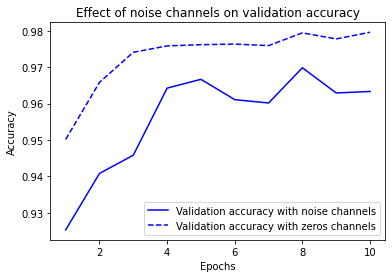

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#if we had the random noise, it will cause suspisious correlation and perofrmance goes down. 
#not recommended to add random noise in classification

Noisy features inevitably lead to overfitting. As such, in cases where
you aren’t sure whether the features you have are informative or distracting, it’s common to do feature selection before training

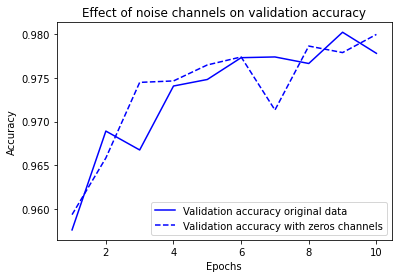

In [ ]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#the 2 validation are quite similar

### The nature of generalization in deep learning

A remarkable fact about deep learning models is that they can be trained to
fit anything, as long as they have enough representational power

**Fitting a MNIST model with randomly shuffled labels**

Even though there is no relationship
whatsoever between the inputs and
the shuffled labels, the training loss
goes down just fine 

Naturally, the validation loss does not
improve at all over time

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)
#the accuracy is increasing with the epochs. The validation accuracy is constant at 10%
#in this case it's overfitting compare to the dataset
#If validation accuracy is not increasing then we should review dataset & model

Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 2.3166 - accuracy: 0.1049 - val_loss: 2.3060 - val_accuracy: 0.1080
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2999 - accuracy: 0.1162 - val_loss: 2.3132 - val_accuracy: 0.1079
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2902 - accuracy: 0.1271 - val_loss: 2.3155 - val_accuracy: 0.1005
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2754 - accuracy: 0.1413 - val_loss: 2.3260 - val_accuracy: 0.1072
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2576 - accuracy: 0.1545 - val_loss: 2.3353 - val_accuracy: 0.1039
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2360 - accuracy: 0.1687 - val_loss: 2.3490 - val_accuracy: 0.1068
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2114 - accuracy: 0.1852 - val_loss: 2.3577 - val_accuracy: 0.1079

#### The manifold hypothesis

Actual handwritten digits only occupy a tiny subspace of the parent space of all possible 28 × 28 uint8 arrays

All samples in the valid subspace are connected by smooth paths that run through the subspace

Manifold hypothesis posits that all natural data lies on a low-dimensional
manifold within the high-dimensional space where it is encoded

Machine learning models only have to fit relatively simple, lowdimensional, highly structured subspaces within their potential input space (latent manifolds).

Within one of these manifolds, it’s always possible to interpolate between two inputs, that is to say, morph one into another via a continuous path along which all points fall on the manifold.

#### Interpolation as a source of generalization

Deep learning achieves generalization via interpolation on a learned approximation of the data manifold


Manifold interpolation= intermediate point on the latent manifold

Linear interpolation= average in the encoding space

#### Why deep learning works

A sheet of paper represents a 2D manifold within 3D space. A deep learning model is a tool for uncrumpling paper balls, that is, for disentangling latent manifolds.

#### Training data is paramount

Deep learning is curve fitting, for a model to perform well it needs to be
trained on a dense sampling of its input space

Sparse sampling=the model learned doesn't match the latent space and leads to incorrect interpolation

Dense sampling= the model learned approximates the latent space well, & interpola° leads to generalization

## Evaluating machine-learning models

Goal is to achieve models that generalize

It’s essential to be able to reliably measure the generalization power of your model

### Training, validation, and test sets

Tuning parameters and hyperparameters is a form of learning

Tuning is based on its performance on validation set

Tuning a lot would cause information leak

Thus, you need never-before-seen test dataset

#### Simple hold-out validation

In [6]:
num_validation_samples=10000
np.random.shuffle(data) #shuffling the data is usually appropriate
validation_data=data[:num_validation_samples] #define the validation set
training_data=data[num_validation_samples:] #defines the training set

#trains a model on the training data, and evaluates it on the validation data
model=get_model()
model.fit(training_data,...)
validation_score=model.evaluate(validation_data,...) 

#at this point you can tune your model, retrain it, evaluate it, tune it again...
#once you've tuned your hyperparameters it's common to train your final model from scratch on all non test data avaliable
model=get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = model.evaluate(test_data, ...)

NameError: ignored

#### K-fold validation

In [7]:
k=3
num_validation_samples=len(data)//k
np.random.shuffle(data)
validation_scores=[]
for fold in range (k):
  validation_data = data[num_validation_samples*fold:num_validation_samples*(fold+1)]#select the valdata part°
  training_data=np.concatenate( #use the remainder of the data as training data. Note that the +operator represents list concatenation not summation
      data[:num_validation_samples*fold],
      data[num_validation_samples*(fold+1):])
  model=get_model()#create a brandnew instance of the model (untrained)
  model.fit(training_data,...)
  validation_score=model.evaluate(validation_data,...)
  validation_scores.append(validation_score)
validation_score=np.average(validation_scores)#val°score: average of the validation scores of the k folds
model=get_model() #train the final model on all non test data available
model.fit(data,...)
test_score=model.evaluate(test_data,...)

#### Iterated K-fold validation with shuffling

This one is for situations in which you have relatively little data available
and you need to evaluate your model as precisely as possible

Applying K-fold validation multiple times, shuffling the data every time
before splitting it K ways

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

Data representativeness:Randomly shuffle data before splitting it

The arrow of time:If you are predicting future event, don’t shuffle. Use future data as test set

Redundancy in your data: Remove redundant data before the start

## Improving model fit

To achieve the perfect fit, you must first overfit. Since you don’t know in advance where the boundary lies, you must
cross it to find it.

Once you have such a model, you’ll focus on refining generalization by fighting overfitting.

Three common problems: 1) training loss doesn’t go down,
2) model doesn’t meaningfully generalize, 3) training and
validation loss both go down but model still underfitting

### Tuning key gradient descent parameters

Sometimes training doesn’t get started

When this happens, it’s always a problem with the configuration of the gradient descent process

**Training a MNIST model with an incorrectly high learning rate**

In [8]:
#Training a MNIST model with an incorrectly high learning rate
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 791.4219 - accuracy: 0.3554 - val_loss: 2.1079 - val_accuracy: 0.2750
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 6.4736 - accuracy: 0.2524 - val_loss: 2.2071 - val_accuracy: 0.2072
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8820 - accuracy: 0.2367 - val_loss: 2.2384 - val_accuracy: 0.2529
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 3.2342 - accuracy: 0.2356 - val_loss: 2.3407 - val_accuracy: 0.2366
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7408 - accuracy: 0.2428 - val_loss: 2.4204 - val_accuracy: 0.2304
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6818 - accuracy: 0.2281 - val_loss: 2.0799 - val_accuracy: 0.2401
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5804 - accuracy: 0.2298 - val_loss: 2.1018 - val_accuracy: 0.2577
Epoc

**The same model with a more appropriate learning rate**

In [9]:
#The same model with a more appropriate learning rate
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3686 - accuracy: 0.9102 - val_loss: 0.1423 - val_accuracy: 0.9605
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1377 - accuracy: 0.9637 - val_loss: 0.1354 - val_accuracy: 0.9668
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1107 - accuracy: 0.9731 - val_loss: 0.1908 - val_accuracy: 0.9640
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9786 - val_loss: 0.2081 - val_accuracy: 0.9683
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.9820 - val_loss: 0.2277 - val_accuracy: 0.9679
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9851 - val_loss: 0.2497 - val_accuracy: 0.9682
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9865 - val_loss: 0.2469 - val_accuracy: 0.9722
Epoch 

### Leveraging better architecture priors

Model trains but doesn’t generalize. What’s going on?

The kind of model you’re using is not suited for the problem

In the following chapters, you’ll learn about the best architectures to use for a variety of data modalities—images,
text, timeseries, and so on.

### Increasing model capacity

If you manage to get to a model that fits, you need to get your model to start overfitting.

**A simple logistic regression on MNIST**

In [10]:
#a simple logistic regression on MNIST
model = keras.Sequential([layers.Dense(10, activation="softmax")]) #we only define 1 simple layer with softmax activation same as logistic regression 
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)
#the validation loss is going down so the model is fitting
#validation accuracy goes up always et test accuracy same --> no overfitting



Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6745 - accuracy: 0.8331 - val_loss: 0.3584 - val_accuracy: 0.9050
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.9029 - val_loss: 0.3079 - val_accuracy: 0.9151
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3155 - accuracy: 0.9114 - val_loss: 0.2916 - val_accuracy: 0.9180
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9162 - val_loss: 0.2815 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2895 - accuracy: 0.9189 - val_loss: 0.2771 - val_accuracy: 0.9222
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.9213 - val_loss: 0.2728 - val_accuracy: 0.9249
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.9227 - val_loss: 0.2709 - val_accuracy: 0.9244
Epoch 

it’s likely a problem with the
representational power of your model

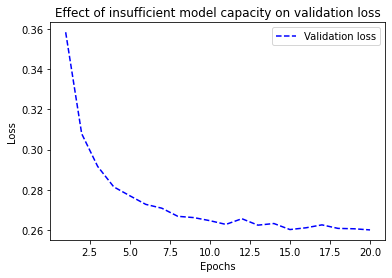

In [11]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [13]:
#use bigger model
#this time 3 layers 
#we can see the minimum and after it's increasing again (= overfitting)
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3644 - accuracy: 0.8959 - val_loss: 0.2072 - val_accuracy: 0.9399
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1643 - accuracy: 0.9520 - val_loss: 0.1435 - val_accuracy: 0.9582
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1164 - accuracy: 0.9650 - val_loss: 0.1236 - val_accuracy: 0.9641
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.9729 - val_loss: 0.1129 - val_accuracy: 0.9676
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 0.1018 - val_accuracy: 0.9696
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0962 - val_accuracy: 0.9725
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9844 - val_loss: 0.1062 - val_accuracy: 0.9692
Epoch 

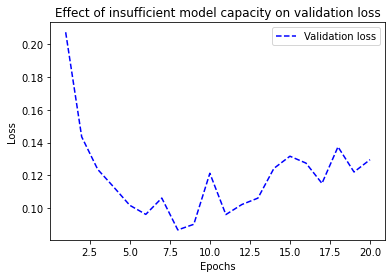

In [14]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#better loss here

## Improving generalization

Once your model has shown itself to have some generalization power and to be able to overfit, it’s time to switch your focus to maximizing generalization.

Dataset curation: Make sure you have enough data, Minimize labeling errors, Clean your data and deal with missing values, Feature selection, etc

### Dataset curation

### Feature engineering

Feature engineering is the process of using your own knowledge about the data to make the algorithm work better by
applying hardcoded (non-learned) transformations to the data

Good features allow you to solve problems using fewer resources

Good features let you solve a problem with far less data

### Using early stopping

In deep learning, we always use models that are vastly overparameterized. Interrupt training long before you’ve
reached the minimum possible training loss.

In Keras, it’s typical to do this with an EarlyStopping callback

### Regularizing your model

Regularization techniques are a set of best practices that actively impede the model’s ability to fit perfectly to the
training data, with the goal of making the model perform better during validation

#### Reducing the network's size

The simplest way to prevent overfitting is to reduce the size of the model

**Original model**

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"), #in this model our layers have 16 output dimension
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5202 - accuracy: 0.7799 - val_loss: 0.3887 - val_accuracy: 0.8759
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3087 - accuracy: 0.9037 - val_loss: 0.3042 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2204 - accuracy: 0.9293 - val_loss: 0.2811 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1730 - accuracy: 0.9439 - val_loss: 0.2810 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1368 - accuracy: 0.9583 - val_loss: 0.2891 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1131 - accuracy: 0.9649 - val_loss: 0.3014 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0965 - accurac

**Version of the model with lower capacity**

In [16]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5721 - accuracy: 0.7744 - val_loss: 0.4787 - val_accuracy: 0.8500
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4079 - accuracy: 0.8880 - val_loss: 0.3818 - val_accuracy: 0.8760
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3205 - accuracy: 0.9077 - val_loss: 0.3306 - val_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2625 - accuracy: 0.9236 - val_loss: 0.2994 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2217 - accuracy: 0.9347 - val_loss: 0.2833 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1922 - accuracy: 0.9417 - val_loss: 0.2854 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1687 - accuracy: 0.9510 - val_loss: 0.2783 - val_accuracy: 0.8876
Epoch 8/20
30

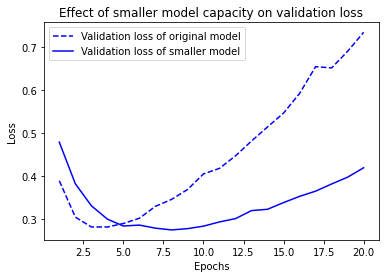

In [17]:
#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#effect of validation loss of smaller model is overfitting and doesn't perform really good(curve not near 0)

**Version of the model with higher capacity**

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5413 - accuracy: 0.7572 - val_loss: 0.3007 - val_accuracy: 0.8835
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2527 - accuracy: 0.9040 - val_loss: 0.4339 - val_accuracy: 0.8180
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1406 - accuracy: 0.9477 - val_loss: 0.3181 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1017 - accuracy: 0.9701 - val_loss: 0.3642 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1469 - accuracy: 0.9751 - val_loss: 0.3209 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0059 - accuracy: 0.9997 - val_loss: 0.4870 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.5686 - val_accuracy: 0.8875
Epoch 8/20
30

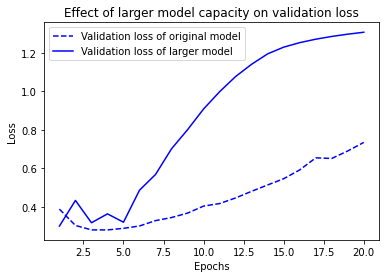

In [19]:
#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",#pour a avoir une courbe en pointillée
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-", #pour avoir une courbe pleine
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#overfit really fastly. so validation loss of original model looks better. but still overfitting after 5 epochs

#### Adding weight regularization

Simpler models are less likely to overfit than complex ones

Simple model is a model where the parameter values has less entropy

**Adding L2 weight regularization to the model**

In [20]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5872 - accuracy: 0.7939 - val_loss: 0.4894 - val_accuracy: 0.8307
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3993 - accuracy: 0.8929 - val_loss: 0.3887 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3351 - accuracy: 0.9117 - val_loss: 0.3944 - val_accuracy: 0.8666
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3024 - accuracy: 0.9231 - val_loss: 0.3619 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2793 - accuracy: 0.9323 - val_loss: 0.3544 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2707 - accuracy: 0.9324 - val_loss: 0.3648 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2576 - accuracy: 0.9383 - val_loss: 0.3756 - val_accuracy: 0.8788
Epoch 8/20
30

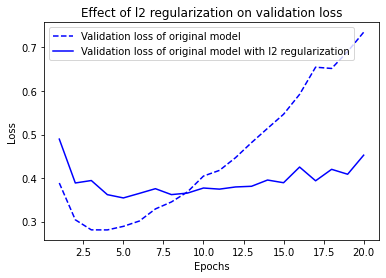

In [21]:
#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",#pour a avoir une courbe en pointillée
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-", #pour avoir une courbe pleine
         label="Validation loss of original model with l2 regularization")
plt.title("Effect of l2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#overfitting pb is prevented however loss is worst than original one

**Different weight regularizers available in Keras**

In [22]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

Randomly dropping out (setting to zero) a number of output features of the layer during training

**Adding dropout to the IMDB model**

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
#At testing time
#layer_output*=np.random.randint(0,high=2, size=layer_output.shape) #at training time drops out 50% of the units in the output
#layer_output*=0.5 

#at training time
#layer_output*=np.random.randint(0,high=2, size=layer_output.shape)
#layer_output/=0.5 #note that we're scalling up rather scaling down in this case.

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6535 - accuracy: 0.6047 - val_loss: 0.5777 - val_accuracy: 0.8205
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5575 - accuracy: 0.7384 - val_loss: 0.4687 - val_accuracy: 0.8522
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4748 - accuracy: 0.8097 - val_loss: 0.3942 - val_accuracy: 0.8737
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4133 - accuracy: 0.8525 - val_loss: 0.3516 - val_accuracy: 0.8820
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3592 - accuracy: 0.8813 - val_loss: 0.3228 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3148 - accuracy: 0.8987 - val_loss: 0.3068 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2740 - accuracy: 0.9159 - val_loss: 0.3129 - val_accuracy: 0.8891
Epoch 8/20
30

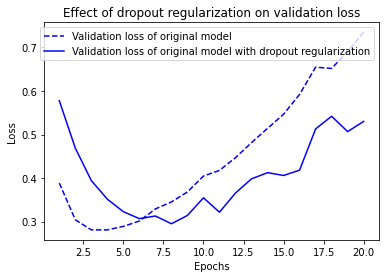

In [24]:
#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",#pour a avoir une courbe en pointillée
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-", #pour avoir une courbe pleine
         label="Validation loss of original model with dropout regularization")
plt.title("Effect of dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#look similar but with dropout look a bit better

## Summary